In [8]:
import sys
sys.path.append('../')
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from machinelearning.mlpipeline import MLPipelines
from dataloader.eda import DataExplorer

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##### Load data and initialize `MLPipelines` 

In [9]:
csv_dir = "../data/ST000369.csv"
label = "Class"

mlpipe = MLPipelines(label=label, csv_dir=csv_dir)
print(mlpipe)

Label mapping: {0: 0.0, 1: 1.0}
There is no selected classifier.
Number of rows: 80 
Number of columns: 182


##### Perform Data Exploration using `DataExplorer` 

Label mapping: {0: 0.0, 1: 1.0}
Normalization completed.


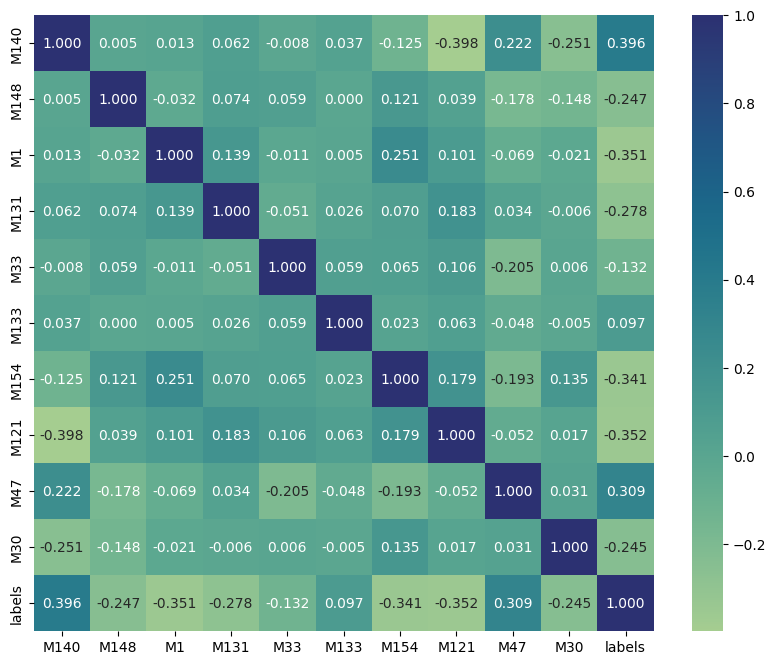

In [10]:
explorer = DataExplorer(csv_dir=csv_dir, label=label)
explorer.correlations(get_table=False, num_of_best_features=10)

In [11]:
# explorer.pairplots_function(num_of_best_features=10)

##### Perform model selection using **Nested Cross Validation**

In [12]:
scores, features_list, all_featues = mlpipe.nested_cv(include=[LogisticRegression(), GaussianNB()], inner_splits=3, outer_splits=3, rounds=1, num_features=[2,5,10])

Your Dataset contains NaN values. Some estimators may not work with NaN values.


KeyboardInterrupt: 

In [ ]:
mlpipe.normalize()

Converting the raw data with minmax normalization method....
Normalization completed.


In [13]:
# Create a parameter grid for XGBoost classifier
param_grid = {
    'n_estimators': [100],
    'max_depth': [3],
    'learning_rate': [0.1]
}

# print('Training with RandomizedSearchCV:')
mlpipe.random_search(estimator=XGBClassifier(), parameter_grid=param_grid)
# print()

# print('Training with GridSearchCV:')
# mlpipe.grid_search(estimator=XGBClassifier(), parameter_grid=param_grid)

KeyboardInterrupt: 

In [ ]:
print(mlpipe.name)

In [ ]:
mlpipe.bootstrap_validation(n_iter=10)

AttributeError: 'XGBClassifier' object has no attribute 'copy'

In [ ]:
mlpipe.bayesian_search(n_trials=3)

  0%|          | 0/3 [00:00<?, ?it/s]

[W 2024-05-10 11:13:36,758] Trial 0 failed with parameters: {} because of the following error: KeyError('NoneType').
Traceback (most recent call last):
  File "/home/WUR/g0012069/env/main/lib/python3.10/site-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "/home/WUR/g0012069/AI4META/notebooks/../machinelearning/mlestimator.py", line 320, in objective
    cls = optuna_grid["ManualSearch"][self.name](trial)
KeyError: 'NoneType'
[W 2024-05-10 11:13:36,759] Trial 0 failed with value None.


KeyError: 'NoneType'